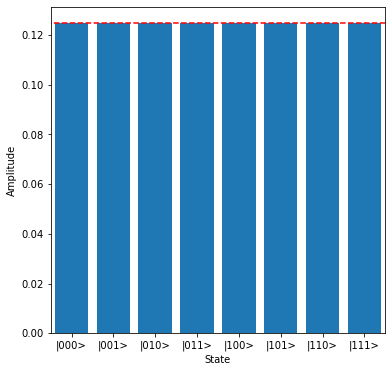

In [4]:
import numpy as np
import matplotlib.pyplot as plt

winner = 3
dataLen = 8
labels = ["|{0:03b}>".format(i) for i in range(dataLen)]
data = 1/dataLen*np.ones(dataLen)

#data[winner] = -data[winner]
#fig, ax = plt.subplots(ncols=3, figsize=(6,6))
plotDist()


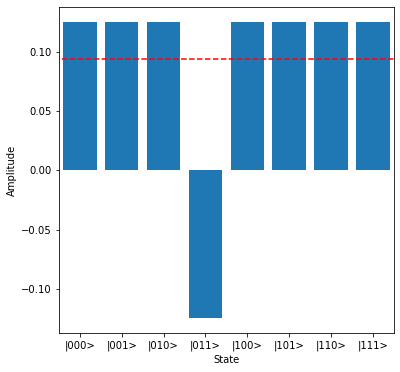

In [122]:
#Flip winner
data[winner] = -data[winner]
plotDist()

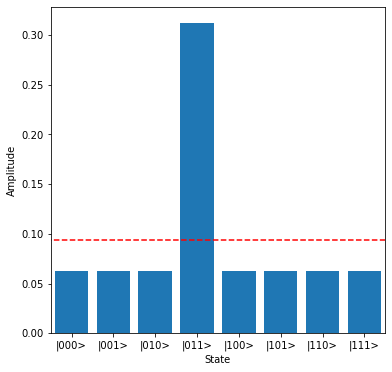

In [123]:
#Flip over mean 
Umean = np.mean(data)
for i in range(len(data)):
    if i !=winner:
        data[i] = data[i]-2*abs((data[i]-Umean))
    else:
        data[i] = Umean-data[i]+Umean
plotDist()

In [60]:
def plotDist():
    fig, ax = plt.subplots(nrows=1, figsize=(6,6))
    ax.bar(range(len(data)), data, align='center') 
    ax.plot([-1,len(data)+1],np.mean(data)*np.ones(2), color='red', linestyle='--')
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('State')
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(labels[0:dataLen]) 
    ax.set_xlim([-.5, len(data)-0.5])
    plt.show()

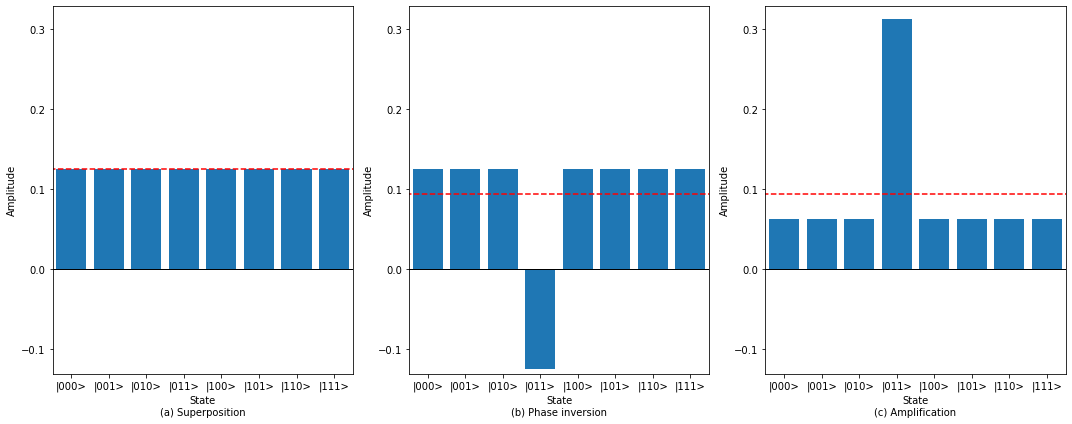

In [43]:
winner = 3
dataLen = 8
labels = ["|{0:03b}>".format(i) for i in range(dataLen)]
data = 1/dataLen*np.ones(dataLen)

#data[winner] = -data[winner]
fig, ax = plt.subplots(ncols=3, figsize=(15,6))
thisAx = ax[0]
thisAx.bar(range(len(data)), data, align='center') 
thisAx.plot([-1,len(data)+1],np.mean(data)*np.ones(2), color='red', linestyle='--')
thisAx.plot([-1,len(data)+1],[0,0], color='black', linewidth=1)

#Flip winner
data[winner] = -data[winner]
thisAx = ax[1]
thisAx.bar(range(len(data)), data, align='center') 
thisAx.plot([-1,len(data)+1],np.mean(data)*np.ones(2), color='red', linestyle='--')
thisAx.plot([-1,len(data)+1],[0,0], color='black', linewidth=1)
minData=np.min(data)

Umean = np.mean(data)
for i in range(len(data)):
    if i !=winner:
        data[i] = data[i]-2*abs((data[i]-Umean))
    else:
        data[i] = Umean-data[i]+Umean
thisAx=ax[2]
thisAx.bar(range(len(data)), data, align='center') 
thisAx.plot([-1,len(data)+1],np.mean(data)*np.ones(2), color='red', linestyle='--')
thisAx.plot([-1,len(data)+1],[0,0], color='black', linewidth=1)
maxData=np.max(data)

titLab = ['(a) Superposition','(b) Phase inversion','(c) Amplification']
for i in range(len(titLab)):
    #ax[i].set_title(i)
    ax[i].set_ylabel('Amplitude')
    ax[i].set_xlabel('State\n'+titLab[i])  
    ax[i].set_xticks(range(len(data)))
    ax[i].set_xticklabels(labels[0:dataLen])
    ax[i].set_xlim([-.5, len(data)-0.5])
    ax[i].set_ylim([minData*1.05, maxData*1.05])
fig.tight_layout()


In [44]:
fig.savefig('fin1.png')

In [ ]:
nqubits=3
qc = QuantumCircuit(nqubits)
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(nqubits):
    qc.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(nqubits):
    qc.x(qubit)
qc.barrier(range(nqubits))
# Do multi-controlled-Z gate
qc.h(nqubits-1)
qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
qc.h(nqubits-1)
qc.barrier(range(nqubits))
    # Apply transformation |11..1> -> |00..0>
for qubit in range(nqubits):
    qc.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(nqubits):
    qc.h(qubit)

qc.draw(output='mpl')

In [ ]:

noQubit=3

qc2 = QuantumCircuit(noQubit)
qc2.h(range(noQubit))
qc2.append(oracle(noQubit,[0]),range(noQubit))
qc2.h(range(noQubit))
qc2.draw(output='mpl', idle_wires=True)

In [ ]:
%matplotlib widget

fig, ax = plt.subplots(1,2, figsize=(15,10))

qc.draw(output='mpl',ax=ax[0])
qc2.draw(output='mpl',ax=ax[1])
ax[0].set_title("(a)")
ax[1].set_title("(b)")